In [2]:
import numpy as np
import math
from random import *
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

In [3]:
mu, sigma = 0, 0.5 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 10000) #w1
s2 = np.random.normal(mu, sigma, 10000) #w2
s3 = np.random.normal(mu, sigma, 10000) #w3
s4=1-s1-s2-s3

In [4]:
expected_returns=np.array([ 1.10, 1.12,1.07,1.025,])
returns=s1*expected_returns[0]+s2*expected_returns[1]+s3*expected_returns[2]+s4*expected_returns[3]
covariance_matrix=np.array([[0.06,0.0377,0.0259],[0.0377,0.0950,0.0285],[0.0259,0.0285,0.07]])

weights=np.column_stack((s1,s2,s3))
variance=[]
for i in range(0,10000):
    variance=variance+[math.sqrt(np.dot(np.dot(weights[i,:],covariance_matrix),weights[i,:].T))]


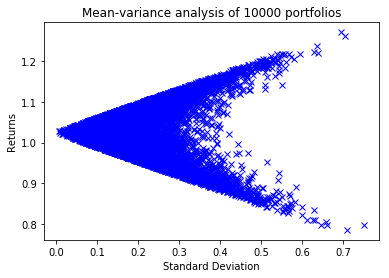

In [5]:
plt.plot(variance,returns,'bx')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.title('Mean-variance analysis of 10000 portfolios')
plt.show()


In [6]:
risky_returns=np.array([1.1,1.12,1.07])
w=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)
w_s4=1-sum(w)

returns=sum(w*risky_returns)+w_s4*1.025
variance=np.dot(np.dot(w.T,covariance_matrix),w)
stdev=math.sqrt(variance)
sharpe_ratio=(returns-1.025)/stdev
print("Mean", returns)
print("Stdev", stdev)
print("Sharpe Ratio", sharpe_ratio)


Mean 1.151234693
Stdev 0.35529521949545656
Sharpe Ratio 0.355295219495


In [7]:
print(w,w_s4)

[ 0.80294532  0.6579969   0.07786864] -0.538810855648


In [8]:
#(d)
norm=sum(w)
w=w/norm
print(w)
returns=sum(w*risky_returns)
variance=np.dot(np.dot(w.T,covariance_matrix),w)
stdev=math.sqrt(variance)
sharpe_ratio=(returns-1.025)/stdev
print("Mean", returns)
print("Stdev", stdev)
print("Sharpe Ratio", sharpe_ratio)


[ 0.52179598  0.42760089  0.05060312]
Mean 1.10703392414
Stdev 0.23088946779352756
Sharpe Ratio 0.355295219495


In [9]:
#(e)
Cov1=np.dot(np.dot(np.array([1,0,0]),covariance_matrix),w)
Cov2=np.dot(np.dot(np.array([0,1,0]),covariance_matrix),w)
Cov3=np.dot(np.dot(np.array([0,0,1]),covariance_matrix),w)
Beta1=Cov1/variance
Beta2=Cov2/variance
Beta3=Cov3/variance

print("Cov 1: ",Cov1)
print("Cov 2: ",Cov2)
print("Cov 3: ",Cov3)

print("Beta 1: ",Beta1)
print("Beta 2: ",Beta2)
print("Beta 3: ",Beta3)

Cov 1:  0.0487389335244
Cov 2:  0.0617359824642
Cov 3:  0.0292433601146
Beta 1:  0.914255910433
Beta 2:  1.15805748655
Beta 3:  0.54855354626


In [10]:
#(f)
Gamma1=2
w1=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)/Gamma1
Gamma2=5
w2=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)/Gamma2
print("w1: ",w1)
print("w2: ",w2)

w1:  [ 0.40147266  0.32899845  0.03893432]
w2:  [ 0.16058906  0.13159938  0.01557373]


In [11]:
w1_rf=1-sum(w1)
w2_rf=1-sum(w2)
print("w1_rf: ",w1_rf)
print("w2_rf: ",w2_rf)

w1_rf:  0.230594572176
w2_rf:  0.69223782887


In [12]:
# Gamma = 2
print("Gamma = 2")
returns1=sum(w1*risky_returns)+w1_rf*1.025
variance1=np.dot(np.dot(w1.T,covariance_matrix),w1)
stdev1=math.sqrt(variance1)
sharpe_ratio1=(returns1-1.025)/stdev1
print("Mean", returns1)
print("Stdev", stdev1)
print("Sharpe Ratio", sharpe_ratio1)

# Gamma = 5
print("Gamma = 5")
returns2=sum(w2*risky_returns)+w2_rf*1.025
variance2=np.dot(np.dot(w2.T,covariance_matrix),w2)
stdev2=math.sqrt(variance2)
sharpe_ratio2=(returns2-1.025)/stdev2
print("Mean", returns2)
print("Stdev", stdev2)
print("Sharpe Ratio", sharpe_ratio2)

Gamma = 2
Mean 1.0881173465
Stdev 0.17764760974772828
Sharpe Ratio 0.355295219495
Gamma = 5
Mean 1.0502469386
Stdev 0.07105904389909132
Sharpe Ratio 0.355295219495


# Problem 2

In [72]:
workbook=pd.read_csv("PS3_q2_rawdata.csv",header=0)
headers=workbook.iloc[5,:].tolist()
data=workbook.iloc[6:,:]
data.columns = headers
data[headers] = data[headers].convert_objects(convert_numeric=True)
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Period,sp500,1m_Tbill,MCD,LUV,AIG
6,19970131,0.061317,0.0045,0.002755,0.000000,0.118938
7,19970228,0.005928,0.0039,-0.047802,0.068707,-0.001032
8,19970331,-0.042614,0.0043,0.092486,-0.058511,-0.029132
9,19970430,0.058406,0.0043,0.132275,0.242938,0.094782
10,19970530,0.058577,0.0049,-0.059206,-0.063216,0.053502
11,19970630,0.043453,0.0037,-0.038557,0.004854,0.104155
12,19970731,0.078123,0.0043,0.112549,0.120773,0.069456
13,19970829,-0.057446,0.0041,-0.118233,-0.034084,-0.113850
14,19970930,0.053154,0.0044,0.006605,0.142857,0.094172
15,19971031,-0.034478,0.0042,-0.059055,0.019531,-0.010902


In [98]:
rf_return=data.iloc[:,2]
n=len(rf_return)
exreturn_SP500=data.iloc[:,1]-rf_return
exreturn_MCD=data.iloc[:,3]-rf_return
exreturn_LUV=data.iloc[:,4]-rf_return
exreturn_AIG=data.iloc[:,5]-rf_return
one= pd.Series(1, index=range(6,n+6))
    
# MCD
X_MCD=pd.concat([one, exreturn_MCD], axis=1)
Beta_MCD=np.dot(np.linalg.inv(np.dot(X_MCD.T,X_MCD)),np.dot(X_MCD.T,exreturn_SP500))
ss_res=ss_tot=0
for k in range(0,len(one)):
    ss_tot=ss_tot+np.power((exreturn_SP500.iloc[k]-exreturn_SP500.mean(0)),2)
    ss_res=ss_res+np.power(exreturn_SP500.iloc[k]-(Beta_MCD[0]+exreturn_MCD.iloc[k]*Beta_MCD[1]),2)/n
R_squared_MCD=1-ss_res/ss_tot
print("Result for MCD:")
print("Alpha=",Beta_MCD[0])
print("Beta=",Beta_MCD[1])
print("R squared=",R_squared_MCD)

# LUV
X_LUV=pd.concat([one, exreturn_LUV], axis=1)
Beta_LUV=np.dot(np.linalg.inv(np.dot(X_LUV.T,X_LUV)),np.dot(X_LUV.T,exreturn_SP500))
ss_res=ss_tot=0
for k in range(0,len(one)):
    ss_tot=ss_tot+np.power((exreturn_SP500.iloc[k]-exreturn_SP500.mean(0)),2)
    ss_res=ss_res+np.power(exreturn_SP500.iloc[k]-(Beta_LUV[0]+exreturn_LUV.iloc[k]*Beta_LUV[1]),2)/n
R_squared_LUV=1-ss_res/ss_tot
print("Result for LUV:")
print("Alpha=",Beta_LUV[0])
print("Beta=",Beta_LUV[1])
print("R squared=",R_squared_LUV)

# AIG
X_AIG=pd.concat([one, exreturn_AIG], axis=1)
Beta_AIG=np.dot(np.linalg.inv(np.dot(X_AIG.T,X_AIG)),np.dot(X_AIG.T,exreturn_SP500))
ss_res=ss_tot=0
for k in range(0,len(one)):
    ss_tot=ss_tot+np.power((exreturn_SP500.iloc[k]-exreturn_SP500.mean(0)),2)
    ss_res=ss_res+np.power(exreturn_SP500.iloc[k]-(Beta_AIG[0]+exreturn_AIG.iloc[k]*Beta_AIG[1]),2)/n
R_squared_AIG=1-ss_res/ss_tot
print("Result for AIG:")
print("Alpha=",Beta_AIG[0])
print("Beta=",Beta_AIG[1])
print("R squared=",R_squared_AIG)

Result for MCD:
Alpha= 0.000632989266854
Beta= 0.357702986788
R squared= 0.996859415257
Result for LUV:
Alpha= 0.000783382072428
Beta= 0.241944129393
R squared= 0.996840913129
Result for AIG:
Alpha= 0.00308102913583
Beta= 0.0796545878579
R squared= 0.996486713964


In [115]:
# CHECK: using statistics package
import statsmodels.formula.api as sm
frames = [exreturn_MCD, exreturn_SP500]
df = pd.concat(frames, axis=1)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[[0]], df[1])
print("Alpha MCD: ",reg.intercept_)
print("Beta MCD: ",reg.coef_)


Alpha MCD:  0.000632989266854
Beta MCD:  [ 0.35770299]


In [120]:
Beta_CAPM_MCD=exreturn_MCD.mean(0)/exreturn_SP500.mean(0)
Beta_CAPM_LUV=exreturn_LUV.mean(0)/exreturn_SP500.mean(0)
Beta_CAPM_AIG=exreturn_AIG.mean(0)/exreturn_SP500.mean(0)
print("Beta_CAPM_MCD: ",Beta_CAPM_MCD)
print("Beta_CAPM_LUV: ",Beta_CAPM_LUV)
print("Beta_CAPM_AIG: ",Beta_CAPM_AIG)

Beta_CAPM_MCD:  2.3360242747443967
Beta_CAPM_LUV:  3.2922622087939692
Beta_CAPM_AIG:  2.5084418367081933


In [122]:
# We compute the excess return
SP_increase=0.022-rf_return.mean(0)
print("Expected excess returns in bps")
#CAPM
ex_CAPM_MCD=Beta_CAPM_MCD*SP_increase
ex_CAPM_LUV=Beta_CAPM_LUV*SP_increase
ex_CAPM_AIG=Beta_CAPM_AIG*SP_increase
print("ex_CAPM_MCD: ",ex_CAPM_MCD*100)
print("ex_CAPM_LUV: ",ex_CAPM_LUV*100)
print("ex_CAPM_AIG: ",ex_CAPM_AIG*100)
# Linear regression
ex_LR_MCD=Beta_MCD[1]*SP_increase+Beta_MCD[0]
ex_LR_LUV=Beta_LUV[1]*SP_increase+Beta_LUV[0]
ex_LR_AIG=Beta_AIG[1]*SP_increase+Beta_AIG[0]
print("ex_LR_MCD: ",ex_LR_MCD*100)
print("ex_LR_LUV: ",ex_LR_LUV*100)
print("ex_LR_AIG: ",ex_LR_AIG*100)

Expected excess returns in bps
ex_CAPM_MCD:  4.729865150288718
ex_CAPM_LUV:  6.66600790725559
ex_CAPM_AIG:  5.0789676088749145
ex_LR_MCD:  0.787558049184
ex_LR_LUV:  0.568214583231
ex_LR_AIG:  0.469383540348


In [153]:
data_pre = data[data['Period'] < 20070131] 
rf_return_2=data_pre.iloc[:,2]
exreturn_SP500_2=data_pre.iloc[:,1]-rf_return
exreturn_MCD_2=data_pre.iloc[:,3]-rf_return
exreturn_LUV_2=data_pre.iloc[:,4]-rf_return
exreturn_AIG_2=data_pre.iloc[:,5]-rf_return
frames_2=[exreturn_MCD_2, exreturn_LUV_2,exreturn_AIG_2]
df = pd.concat(frames_2, axis=1)
returns_vector=df.mean(0)
covariance_matrix_2=df.cov(0)
MVF_weights=np.dot(np.linalg.inv(covariance_matrix_2),returns_vector)
MVF_weights=MVF_weights/sum(MVF_weights)
print("weight MCD: ",MVF_weights[0])
print("weight LUV: ",MVF_weights[1])
print("weight AIG: ",MVF_weights[2])


weight MCD:  0.125903162753
weight LUV:  0.448313500412
weight AIG:  0.425783336835


In [160]:
Mean=sum(MVF_weights*returns_vector)
print("Mean: ", Mean)
Variance=np.dot(np.dot(MVF_weights.T,covariance_matrix_2),MVF_weights)
StDev=math.sqrt(Variance)
print("StDev: ", StDev)
# Annualized
print("Annualized Mean: ", np.power(1+Mean,12))
print("Annualized StDev: ", StDev*math.sqrt(12))

Mean:  0.00973460965992
StDev:  0.06386778230473272
Annualized Mean:  1.12327710927
Annualized StDev:  0.2212444878370911


In [180]:
frames_22=[exreturn_MCD_2, exreturn_LUV_2,exreturn_AIG_2,exreturn_SP500_2]
df_22 = pd.concat(frames_22, axis=1)
covariance_matrix_22=df_22.cov(0)
Cov_22=np.dot(np.dot((np.asarray(MVF_weights.tolist()+[0])),covariance_matrix_22),np.asarray([0,0,0,1]).T)
Beta_portfolio=Cov_22/exreturn_SP500_2.var(0)
print("Beta_portfolio: ",Beta_portfolio)

print("exreturn_SP500_2.mean(0)",exreturn_SP500_2.mean(0))
print("Beta CAPM: ",Mean/exreturn_SP500_2.mean(0))
####NE FONCTIONNE PAS => REPRENDRE EXO 2

Beta_portfolio:  0.944010668512
exreturn_SP500_2.mean(0) 0.0034572833333333317
Beta CAPM:  2.81568177131


In [177]:
exreturn_SP500_2.mean(0)

0.0018443815512203085

,0,1,2,3
0,0.005793,0.002174,0.002503,0.001773
1,0.002174,0.008091,0.002316,0.001749
2,0.002503,0.002316,0.005312,0.001966
3,0.001773,0.001749,0.001966,0.001954
